<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #77F0A1; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Exploratory Data Analysis 🔎
</div>

## Import

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read clean data from file

In [177]:
data = pd.read_csv('../Data/processed/data_processed.csv')
data.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19+00:00,2023-09-21 11:32:33+00:00,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,"['careers', 'certification', 'community', 'cur...",True,True,True,False,True,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11 06:50:37+00:00,2023-09-21 11:09:25+00:00,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,"['books', 'education', 'hacktoberfest', 'list'...",True,False,True,False,True,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37+00:00,2023-09-21 11:18:22+00:00,NaN,1441,269997,26485,61,...,"['awesome', 'awesome-list', 'lists', 'resource...",True,False,True,False,True,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26 07:31:14+00:00,2023-09-21 08:09:01+00:00,https://996.icu,187799,267901,21497,16712,...,[],False,False,True,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06 02:34:12+00:00,2023-09-21 10:54:48+00:00,NaN,20998,265161,69434,56,...,"['algorithm', 'algorithms', 'coding-interview'...",True,False,True,False,False,False,False,False,main


## Question 01: Is there a correlation between the number of watchers and the frequency of updates?
- **Answering this question will** help us investigate the relationship between the number of watchers and the frequency of updates and understand if there's any correlation between these variables.
- **How we answer this question**: Calculate the correlation coefficient between the 'Watchers' column and the 'TimeSinceUpdate' column

Convert 'Updated At' and "Created At' into datetime

Calculating the time since the last update

In [178]:
data['Updated At'] = pd.to_datetime(data['Updated At'])

In [179]:
now_tz_aware = pd.Timestamp.now(tz=data['Updated At'].dt.tz)
data['TimeSinceUpdate'] = now_tz_aware - data['Updated At']
data['TimeSinceUpdate'] = data['TimeSinceUpdate'].dt.days

Create scatter plot to visualize the relationship between number of watchers and the time since last update.

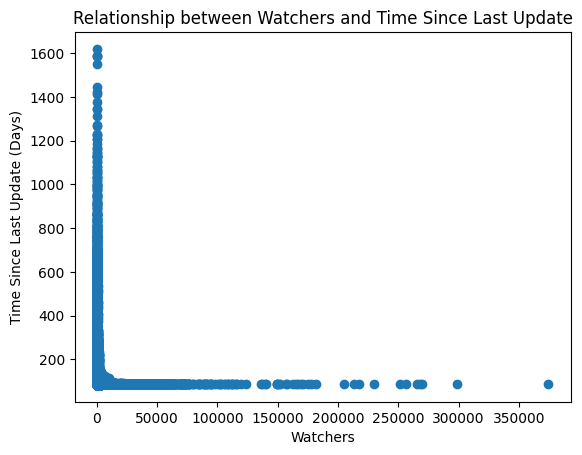

In [180]:
plt.scatter(data['Watchers'], data['TimeSinceUpdate'])
plt.xlabel('Watchers')  
plt.ylabel('Time Since Last Update (Days)')
plt.title('Relationship between Watchers and Time Since Last Update')

data.drop(columns='TimeSinceUpdate',inplace=True)

`Comment`: As we can see, there is no correlation between the number of watchers and the time since last update.

## Question 02: Which topics are most common ?
- **Answering this question will** provide a clear understanding of the most common topics in our dataset, allowing us to identify prevalent themes or subjects among the repositories.
- **How we answer this question**: we'll categorize the dataset using interaction level labels determined by `Popularity Score`: `low` for repositories with minimal population, `medium` for those with average, and `high` for those with substantial population. Then, we'll identify topics that frequently appear in videos categorized as `high`.

In [181]:
data['Topics']

0         ['careers', 'certification', 'community', 'cur...
1         ['books', 'education', 'hacktoberfest', 'list'...
2         ['awesome', 'awesome-list', 'lists', 'resource...
3                                                        []
4         ['algorithm', 'algorithms', 'coding-interview'...
                                ...                        
215024                                                   []
215025                                                   []
215026                                                   []
215027                                                   []
215028                                                   []
Name: Topics, Length: 215029, dtype: object

As we can see, the `Topics` column has a "special" data storage format: it is a `str` but has a structure similar to a `list` containing `str` elements inside. This can be "confusing" for reader, so we will change the format of the `Topics` string as follows: "`str_1|str_2[...]`". By the way, we will also remove the empty value in `Topics` columns.

In [182]:
# convert into format 'a|b|c..'
data['Topics'] = data['Topics'].apply(lambda x: '|'.join(x.strip("[]").replace("\'", "").split(', ')) if isinstance(x, str) else x)
# remove empty value
cop_data = data[data['Topics']!='']

cop_data['Topics'].sample(5)

128469        afterglow|colorscheme|syntax-highlighting|vim
2267      android|android-image-picker|android-image-sel...
78405        github-style|hexo|hexo-theme|hexo-theme-github
112310                                     llvm|obfuscation
123497    aws|container-definition|docker|ecs|fargate|hc...
Name: Topics, dtype: object

Here, we will calculate the `Popularity Score` for each repository based on `Stars`, `Watchers` and `Forks`.

In [183]:
# assign weights to each metric
weight_stars = 0.4
weight_watchers = 0.3
weight_forks = 0.3

# calculate an overall popularity score using weighted sum
cop_data['Popularity_Score'] = (
    cop_data['Stars'] * weight_stars +
    cop_data['Watchers'] * weight_watchers +
    cop_data['Forks'] * weight_forks
)

cop_data['Popularity_Score'].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_16916\1035023464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop_data['Popularity_Score'] = (


count    113957.000000
mean       1068.075871
std        3805.078836
min         117.200000
25%         194.000000
50%         327.700000
75%         743.700000
max      271931.500000
Name: Popularity_Score, dtype: float64

Categorize the dataset using interaction level labels determined by `Popularity Score`

In [184]:
# extract topics from df
topics = cop_data['Topics'].str.split('|', expand=True)  # Splitting tags into separate columns

# add popularity_level category based on Popularity_Score
cop_data['popularity_level'] = pd.qcut(cop_data['Popularity_Score'], q=3, labels=['low', 'medium', 'high'])

# combine topics with popularity levels
topic_engagement = pd.concat([topics, cop_data['popularity_level']], axis=1)

# melt the DataFrame to have each topic in a separate row
melted = topic_engagement.melt(id_vars='popularity_level', value_vars=[0, 1, 2, 3], value_name='Topics')

# drop NaN values resulting from the melt operation
melted = melted.dropna(subset=['Topics'])

# count topic occurrences in each popularity level
topic_frequency = melted.groupby(['popularity_level', 'Topics']).size().reset_index(name='frequency')

# extract rows where 'popularity_levels' is 'high'
high_engagement_topics = topic_frequency[topic_frequency['popularity_level'] == 'high']

# sort topics by frequency in descending order
sorted_high_topics = high_engagement_topics.sort_values(by='frequency', ascending=False)

sorted_high_topics.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_16916\414030091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop_data['popularity_level'] = pd.qcut(cop_data['Popularity_Score'], q=3, labels=['low', 'medium', 'high'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16916\414030091.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  topic_frequency = melted.groupby(['popularity_level', 'Topics']).size().reset_index(name='frequency')


,popularity_level,Topics,frequency
146106,high,android,1921
179847,high,hacktoberfest,1852
184761,high,javascript,1786
165470,high,deep-learning,1238
200672,high,python,1211
178169,high,golang,909
184581,high,java,909
177939,high,go,898
201685,high,react,764
150560,high,awesome,760


Visualize the result

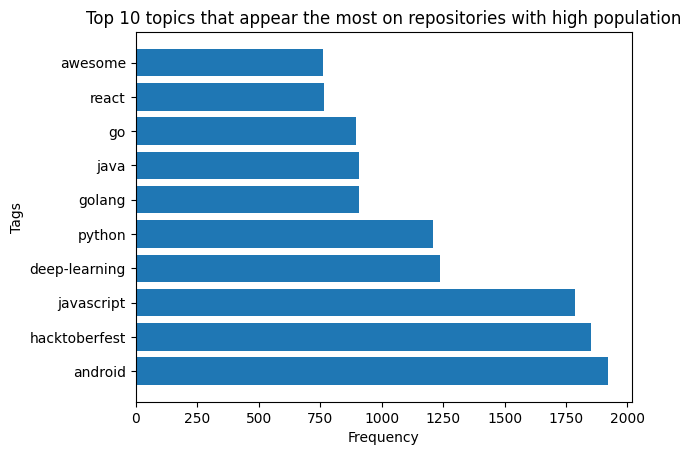

In [185]:
plt.barh(sorted_high_topics['Topics'].head(10),sorted_high_topics['frequency'].head(10))
plt.title('Top 10 topics that appear the most on repositories with high population')
plt.xlabel('Frequency')
plt.ylabel('Tags');

## Question 03: How do the topics associated with repositories correlate with their popularity?
- **Answering this question will** help us reveal which topics tend to be more correlated with higher popularity metrics, offering insights into the relationship between repository content and their perceived popularity among users.
- **How we answer this question**: we will convert the top 10 topics into a numerical format suitable for analysis, then compute the correlation coefficients between each topic and the popularity metric (`Stars`,`Forks`,`Watchers`)

In [186]:
# select top 10 most common topics
top_10_topics = sorted_high_topics.head(10)
# reverse from list of topics to dummy variables
topics = top_10_topics['Topics'].str.get_dummies(sep='|')
# combine dummy variables with original data and columns 'Stars', 'Forks', 'Watchers'
repos_with_topics = pd.concat([data[['Stars', 'Forks', 'Watchers']], topics], axis=1)
# calculate the correlation between dummy variables and columns 'Stars', 'Forks', 'Watchers'
correlation_matrix = repos_with_topics.corr()
# choose the relevant columns only
relevant_columns = correlation_matrix[['Stars', 'Forks', 'Watchers']]

Visualize the heatmap

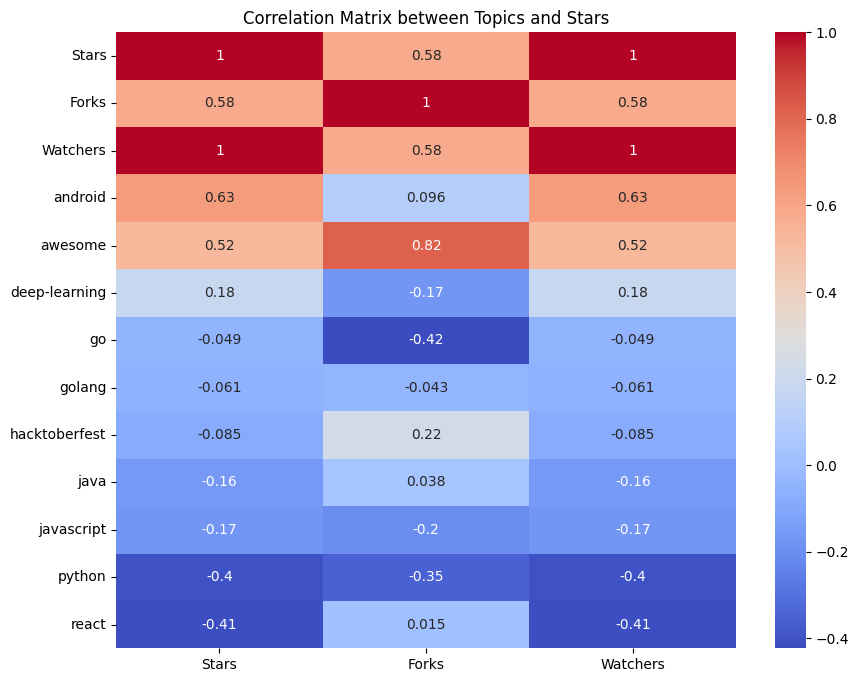

In [187]:
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_columns, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix between Topics and Stars');

`Comment`: We can see that the topics 'android', 'awesome', and 'deep-learning' all exhibit a strong positive correlation with 'Stars' and 'Watchers'. Regarding 'Forks', there's a positive correlation with 'android', 'awesome', and 'hacktoberfest'. It's evident that 'android' and 'awesome' topics hold substantial correlations across these three factors, while other topics show relatively weaker associations, this may indicate the importance of these topics for the attraction and interaction of the user community.